In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
X = 201
Y = 101
dx, dy = 1, 1
u_0 = 1
x = np.arange(1,X+1,dx)
y = np.arange(50,Y+51,dy)
siatka = np.zeros((X,Y))


In [25]:

def przepływSwobodny():

    temp = np.zeros((Y,X))

    for i in range(X):
        for j in range(Y):
            if x[i] != x[0] or x[i] != x[-1] or y[j] != y[-1] or y[j] != y[-1]:
                if not ( ( x[i] >= 95 and x[i] <= 105 ) and ( y[j] <= 70 ) ):
                    temp[j,i] = u_0 * x[i]
    return temp

def przeszkoda(macierz):
    
    temp = macierz

    # for i in range(X):
    #     for j in range(Y):

    #         if 1 <= x[i] <= 94 or 106 <= x[i] <= 201:
    #             temp[0,i] = temp[1,i]

    for i in range(X):
        for j in range(Y):           
            
            if 50 <= y[j] <= 70:
                temp[j,94] = temp[j,93]
                temp[j,104] = temp[j,105]

            if 95 <= x[i] <= 105 and y[j] == 70:
                temp[19,i] = temp[20,i]

            if y[j] == 50:
                temp[0,i] = temp[1,i]

            if y[j] == 70 and x[i] == 95:
                temp[19,94] = (temp[19,93] + temp[20,94])/2
            
            if y[j] == 70 and x[i] == 105:
                temp[19,104] = (temp[19,105] + temp[20,104])/2

    return temp

def uśrednij(macierz):

    temp = macierz

    for i in range(1,X-1):
        for j in range(1,Y-1):   
            if(not ( 95 <= x[i] <= 105 and y[j] <= 70 )):
                temp[j,i] = (temp[j+1,i] + temp[j-1,i] + temp[j,i+1] + temp[j,i-1]) / 4

    return temp

In [26]:
siatka = przepływSwobodny()

for k in range(1000):
    siatka = przeszkoda(siatka)
    siatka = uśrednij(siatka)



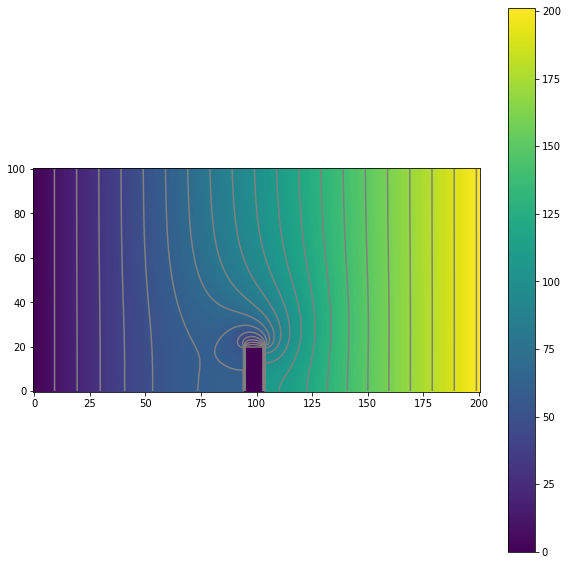

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(siatka, origin='lower')
plt.colorbar()
plt.contour(siatka,range(0,201,10),colors=['#808080'])

In [ ]:
def przepływSwobodnyStrumień():

    temp = np.zeros((Y,X))

    for i in range(X):
        for j in range(Y):
            if x[i] == x[0] or x[i] == x[-1] or y[j] == y[-1]:
                temp[j,i] = u_0 * y[i]
    return temp